## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']].head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

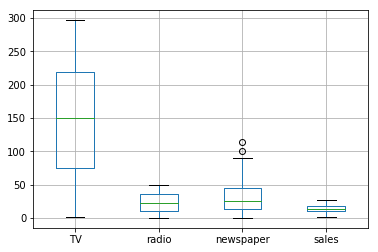

In [4]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

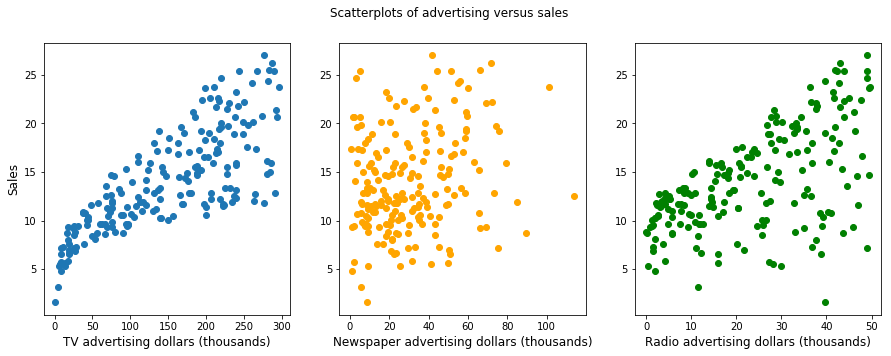

In [5]:
#plt.scatter(Fill_this_in)
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot(131)
ax1.scatter(x=df['TV'], y= df['sales'], label='TV')
ax1.set_xlabel("TV advertising dollars (thousands)", fontsize=12)
ax1.set_ylabel("Sales", fontsize=12)

ax2 = plt.subplot(132)
ax2.scatter(x=df['newspaper'], y= df['sales'], c='orange', label = 'newspaper')
ax2.set_xlabel("Newspaper advertising dollars (thousands)", fontsize=12)

ax3 = plt.subplot(133)
ax3.scatter(x=df['radio'], y= df['sales'], c='green', label = 'radio')
ax3.set_xlabel("Radio advertising dollars (thousands)", fontsize=12)

plt.suptitle("Scatterplots of advertising versus sales")
plt.show()

In [6]:
from pandas.plotting import scatter_matrix 

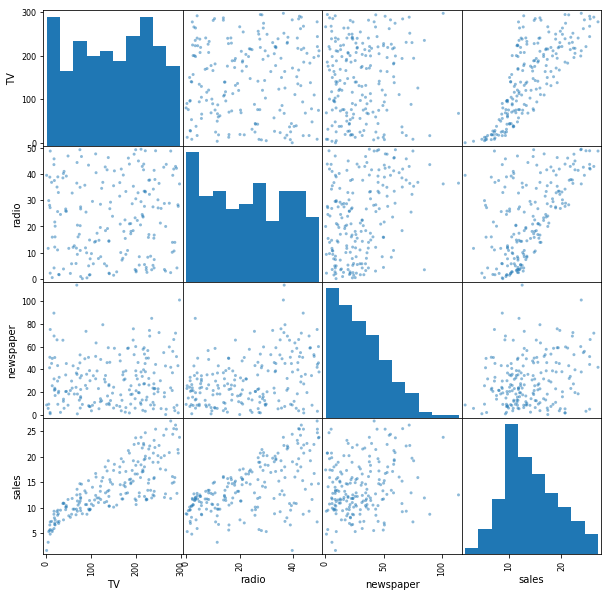

In [7]:
scatter_matrix(df, grid=False, figsize = [10,10])
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

- TV and sales; radio and sales; seem the most correlated, from their scatterplots, a positive linear relationship can be seen.
- This is confirmed by the following correlation table:

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

a) Set y to be the sales in df

In [9]:
y = df['sales']

b) Set X to be just the features described above in df

In [10]:
X = df.iloc[:,[0,1,2]]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [11]:
X_train = X[0:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[0:int(len(X)*0.8)]
y_test = y[int(len(X)*0.8):]

d) Train model on training data, and make predictions on testing data

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
predictions = regr.predict(X_test)
print('Predictions are: {}'.format(predictions))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Predictions are: [ 14.32760252  13.3931802   15.08372563  17.28887207  11.126712
  14.56130444  10.53949868  13.63802366  17.31889273  18.28391286
   7.38133999  14.43760126   7.475535    12.17162591  14.05724444
  24.79183962  20.10091117  12.36147775  16.4151118   12.55656227
  10.80865053  14.21930496   6.6020951   24.20757492  18.74560913
  20.73166888   9.89340209  17.12546566  18.96053303   5.98759002
  12.20478737   8.45403738   4.46959444  18.38398588  16.42220846
   5.40672422   8.2741292   12.97986443  23.84393137  15.4553381 ]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [13]:
print('R squared is: {}'.format(round(regr.score(X_test, y_test), 3)))

R squared is: 0.895


- this is a good level of R squared, as it indicates that the linear model explains 89.5% of variance in the testing data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

In [31]:
type(y_test)

pandas.core.series.Series

(3.4470831600510912, 28.06123388069209)

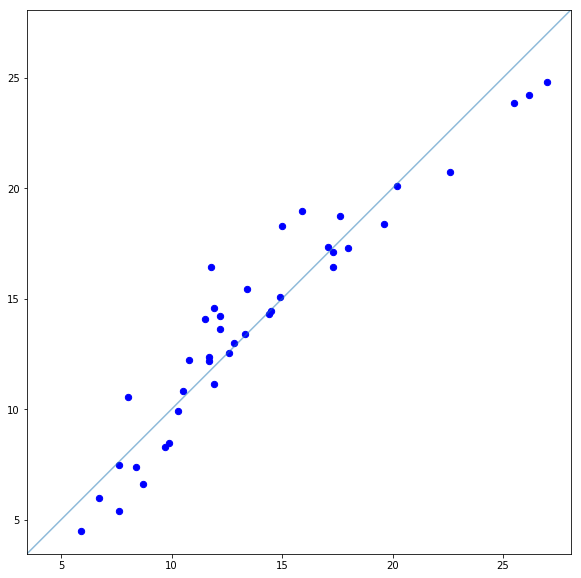

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predictions, s=40, c='b',)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, ls='-', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


- For predictions to reflect testing data, predictions should fall on the 45 degree line in the graph above. We can see that not many points fall exactly on that line, but are still close to the 45 degree line.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

- We could naively compare the magnitude of the coefficients.

Text(0,0.5,'Coefficients')

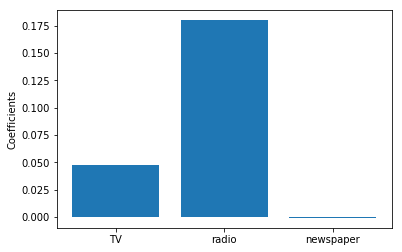

In [17]:
objects = list(X_test.columns)
y_pos = list(range(len(X_test.columns)))
plt.bar(y_pos, regr.coef_)
plt.xticks(y_pos, objects)
plt.ylabel("Coefficients")

- However, we cannot make conclusions about the importance of features in this model based on the bar chart above, as we have not standardized the data to reflect differences in scale of the features of the data. This can be seen from the boxplot below.

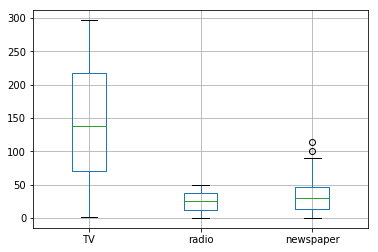

In [18]:
X_train.boxplot()

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

- What could be done is to scale the coefficients such that it reflects the effect of a 1% of mean change in advertising each category on sales. What I will do is multiply each coefficient by their respective column mean in the training data.

In [19]:
newcoef = regr.coef_ * list(np.mean(X_test))

Text(0,0.5,'Coefficients')

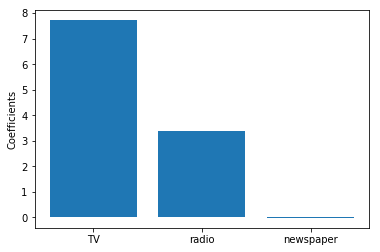

In [20]:
objects = list(X_test.columns)
y_pos = list(range(len(X_test.columns)))
plt.bar(y_pos, newcoef)
plt.xticks(y_pos, objects)
plt.ylabel("Coefficients")

- We now see that TV advertising has the largest impact on sales. What we should have done was to standardize the data before carrying out linear regression.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [43]:
from sklearn.preprocessing import StandardScaler

In [60]:
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

In [57]:
regr2 = LinearRegression()
regr2.fit(X_train_sc[:,[0,1]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
regr2.coef_

array([ 4.03609834,  2.62645546])

In [58]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [60]:
X = df['radio']
Y = df['TV']
Z = df['sales']

TypeError: 'DataFrame' object is not callable

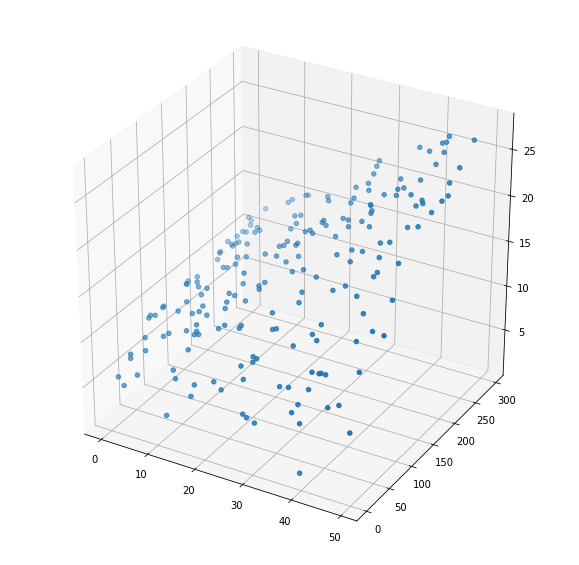

In [61]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(df['radio'],df['TV'],df['sales'])
ax.contour3D(X,Y,df('sales','newspaper'), 50, cmap='binary')

In [29]:
X_test.head()

,TV,radio,newspaper
161,172.5,18.1,30.7
162,85.7,35.8,49.3
163,188.4,18.1,25.6
164,163.5,36.8,7.4
165,117.2,14.7,5.4


In [21]:
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
X = df['TV']
Y = df['radio']
Z = df['sales']

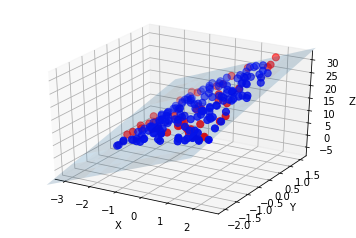

In [68]:
X,Y = np.meshgrid(np.arange(-3, 3, 0.5), np.arange(-3, 3, 0.5))
XX = X.flatten()
YY = Y.flatten()
Z = regr2.coef_[0]*X + regr2.coef_[1]*Y + regr2.intercept_
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(X_test_sc[:,0], X_test_sc[:,1], y_test, c='r', s=50)
ax.scatter(X_train_sc[:,0], X_train_sc[:,1], y_train, c='b', s=50)

plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
#ax.axis('tight')
plt.show()

In [30]:
regr.coef_

array([ 0.0472521 ,  0.179922  , -0.00094408])

In [ ]:
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

In [41]:
# Type your answer here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [124]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, lr):
    points = genfromtxt("data/data.csv", delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

In [116]:
def quietrun(num_iterations, lr):
    points = genfromtxt("data/data.csv", delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

In [125]:
run(100, 0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


(0.035074970592341777, 1.4788027175308358)

## Answer

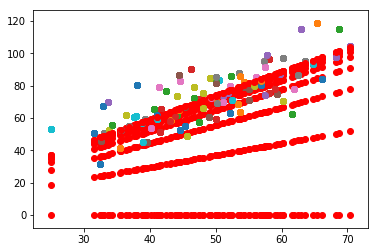

In [126]:
# Use this to visually discuss convergence rate based on learning rate
for num in range(0,10):
    quietrun(num, 0.0001)

- In this instance, with the default learning rate, the model converges within 10 iterations.

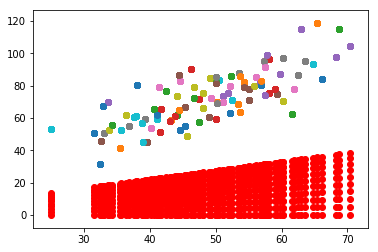

In [118]:
for num in range(0,10):
    quietrun(num, 0.00001)

- In this instance, when the learning rate has been reduced by a factor of 10, the model does not converge within 10 iterations as before. Gradient descent involves updating the weights, in this case, gradient of x. The learning rate determines by how much the weight changes in the direction of the correct weight in each iteration. In this case, the small learning rate results in the gradient of x changing too slowly, resulting in no convergence.

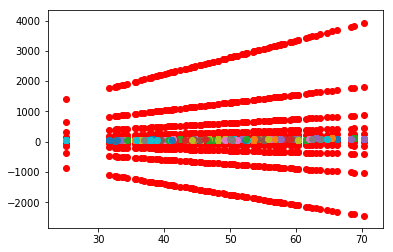

In [123]:
for num in range(0,10):
    quietrun(num, 0.0005)

- In this instance, when the learning rate has been increased from the default learning rate by a factor of 5, the model does not converge within 10 iterations as before. Furthermore, the weight of x is oscillating between positive and negative, getting further and further away from the optimal value. The large learning rate has resulted in the weight of x overshooting the optimum, and each iteration results in overshooting in the opposite direction. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [138]:
def bmrun(num_iterations, lr):
    points = genfromtxt("data/data.csv", delimiter=",")
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    e = compute_error_for_line_given_points(b, m, points)
    return [b,m,e]

In [176]:
defaultlr = np.empty([10,1])
for num in range(10):
    output = bmrun(num, 0.0001)
    defaultlr[num,0] = output[2]
    
lowlr = np.empty([10,1])
for num in range(10):
    output = bmrun(num, 0.00001)
    lowlr[num,0] = output[2]

In [181]:
highlr = np.empty([10,1])
for num in range(10):
    output = bmrun(num, 0.0005)
    highlr[num,0] = output[2]

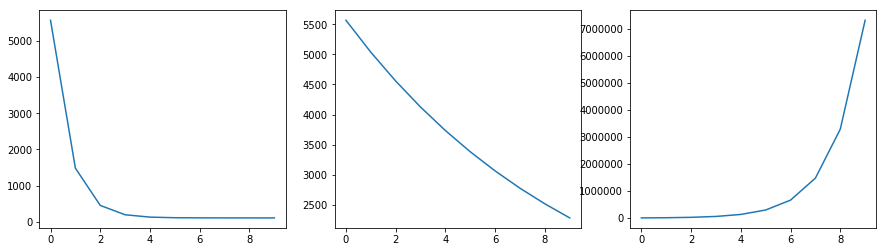

In [182]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot(131)
ax1.plot(defaultlr)

ax2 = plt.subplot(132)
ax2.plot(lowlr)

ax3 = plt.subplot(133)
ax3.plot(highlr)